In [96]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import math

Q = np.array([
    [3, 2],
    [2, 6]
])

b = np.array([2, -8])

Q_sqrt = scipy.linalg.sqrtm(Q)
Q_sqrt_inv = np.linalg.inv(Q_sqrt)

f = lambda x, y: 0.5 * (Q[0, 0] * x**2 + (Q[0, 1] + Q[1, 0]) * x * y + Q[1, 1] * y**2) - b[0] * x - b[1] * y

xbar = np.linalg.inv(Q) @ b
xbar_transformed = Q_sqrt_inv @ b

axis = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(axis, axis)

X_transformed = Q_sqrt[0, 0] * X + Q_sqrt[0, 1] * Y
Y_transformed = Q_sqrt[1, 0] * X + Q_sqrt[1, 1] * Y

f_transformed = lambda x, y: 0.5 * (x**2 + y**2) - b[0] * (Q_sqrt_inv[0, 0] * x + Q_sqrt_inv[0, 1] * y) - b[1] * (Q_sqrt_inv[1, 0] * x + Q_sqrt_inv[1, 1] * y)

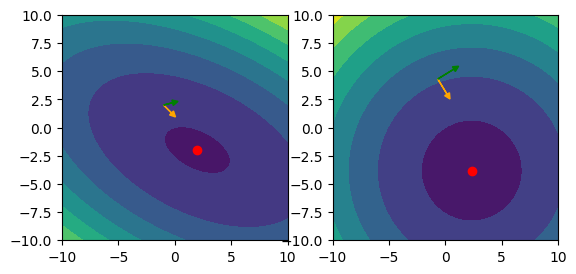

In [100]:
x0 = np.array([-1, 2])
d0 = np.array([1/math.sqrt(2), -1/math.sqrt(2)])
u0 = np.array([1, 0])

beta0 = - np.dot(u0, Q @ d0) / np.dot(d0, Q @ d0)
d0_conj = u0 + beta0 * d0

x0_trans = Q_sqrt @ x0
d0_trans = Q_sqrt @ d0
d0_conj_trans = Q_sqrt @ d0_conj

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.contourf(X, Y, f(X, Y))
ax1.scatter(xbar[0], xbar[1], color='red')

ax1.arrow(x0[0], x0[1], d0[0], d0[1], head_width=0.5, head_length=0.5, fc='orange', ec='orange')
ax1.arrow(x0[0], x0[1], d0_conj[0], d0_conj[1], head_width=0.5, head_length=0.5, fc='green', ec='green')

ax1.set_aspect('equal')

ax2.contourf(X, Y, f_transformed(X, Y))
ax2.scatter(xbar_transformed[0], xbar_transformed[1], color='red')
ax2.arrow(x0_trans[0], x0_trans[1], d0_trans[0], d0_trans[1], head_width=0.5, head_length=0.5, fc='orange', ec='orange')
ax2.arrow(x0_trans[0], x0_trans[1], d0_conj_trans[0], d0_conj_trans[1], head_width=0.5, head_length=0.5, fc='green', ec='green')

ax2.set_aspect('equal')
plt.show()